# 3.2.4 Determinación del tamaño óptimo del dataset con learning_curve

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit, learning_curve
from sklearn.svm import SVC

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

## 3.2.4.1 Definición

Esta función permite computar los scores para los conjuntos de entrenamiento y validación para diferentes tamaños del dataset de entrenamiento.

- El dataset es dividido k veces en entrenamiento y validación.
- Los subconjuntos del dataset de entrenamiento con diferentes tamaños son usados para entrenar el estimador.
- Para cada tamaño, se computa el score para los conjuntos de entrenamiento y validación.
- Los scores computados son promediados sobre las k corridas para cada tamaño del conjunto de entrenamiento.

Esta curva permite determinar:

- Si es beneficioso adicionar más patrones de entrenamiento para mejorar la generalización.
- Comportamiento respeto al dilema bias-variance.
- Tiempos requeridos de cómputo como función de la cantidad de patrones.

## 3.2.4.2 Preparación - Parámetros de la corrida

In [3]:
#
# Preparación de los parámetros
#
X, y = load_digits(return_X_y=True)

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

train_sizes = np.linspace(0.1, 1.0, 5)

## 3.2.4.3 Cómputo de la curva de aprendizaje

In [4]:
#
# La función retorna los siguientes resultados:
#
#   train_sizes_abs: Numbers of training examples that has been used to
#     generate the learning curve
#
#   train_scores: Scores on training sets.
#
#   test_scores: Scores on test set
#
#   fit_times: Times spent for fitting in seconds. Only present if
#     return_times is True.
#
#   score_times: Times spent for scoring in seconds. Only present
#     if return_times is True
#
train_sizes_abs, train_scores, test_scores, fit_times, score_times = learning_curve(
    # -------------------------------------------------------------------------
    # An object of that type which is cloned for each validation.
    estimator=SVC(),
    # -------------------------------------------------------------------------
    # Training vector, where n_samples is the number of samples and n_features
    # is the number of features.
    X=X,
    # -------------------------------------------------------------------------
    # Target relative to X for classification or regression
    y=y,
    # -------------------------------------------------------------------------
    # Determines the cross-validation splitting strategy
    cv=cv,
    # -------------------------------------------------------------------------
    # Relative or absolute numbers of training examples that will be used to
    # generate the learning curve.
    train_sizes=train_sizes,
    # -------------------------------------------------------------------------
    # Whether to return the fit and score times.
    return_times=True,
)

## 3.2.4.4 Resultados devueltos por la función

In [5]:
display(
    train_sizes.shape,
    test_scores.shape,
    train_scores.shape,
    fit_times.shape,
    score_times.shape,
)

(5,)

(5, 100)

(5, 100)

(5, 100)

(5, 100)

In [7]:
#
# Computa la media y la desviación estándar
#
def compute_mean_std(x):
    return np.mean(x, axis=1), np.std(x, axis=1)


train_scores_mean, train_scores_std = compute_mean_std(train_scores)
test_scores_mean, test_scores_std = compute_mean_std(test_scores)
fit_times_mean, fit_times_std = compute_mean_std(fit_times)
score_times_mean, score_times_std = compute_mean_std(score_times)

## 3.2.4.5 Funciones auxiliares

In [8]:
def plot_result(x, mean, std, color, label=None):
    plt.fill_between(x, mean - std, mean + std, alpha=0.1, color=color)
    plt.plot(x, mean, "o-", color=color, label=label)


def format_plot():
    plt.gca().grid()
    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)

## 3.2.4.6 Gráfica train_scores vs train_sizes

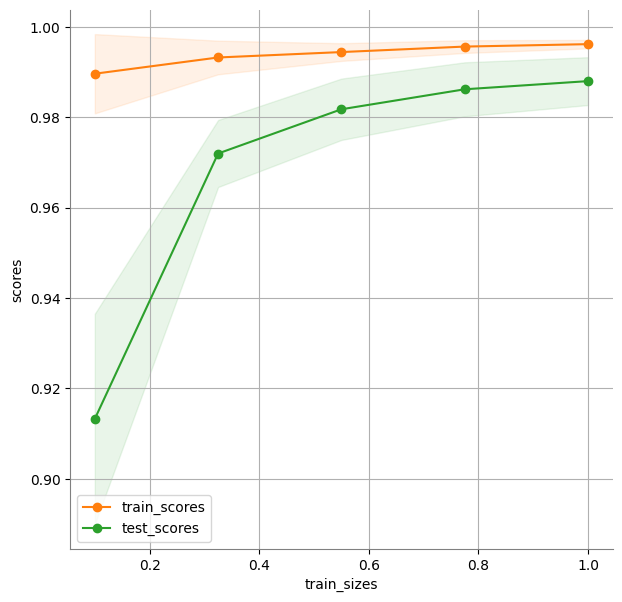

In [9]:
plt.figure(figsize=(7, 7))

plot_result(
    x=train_sizes,
    mean=train_scores_mean,
    std=train_scores_std,
    color="tab:orange",
    label="train_scores",
)

plot_result(
    x=train_sizes,
    mean=test_scores_mean,
    std=test_scores_std,
    color="tab:green",
    label="test_scores",
)

format_plot()
plt.legend(loc="best")
plt.xlabel("train_sizes")
plt.ylabel("scores")
plt.show()

## 3.2.4.7 Gráfica fit_times vs train_sizes

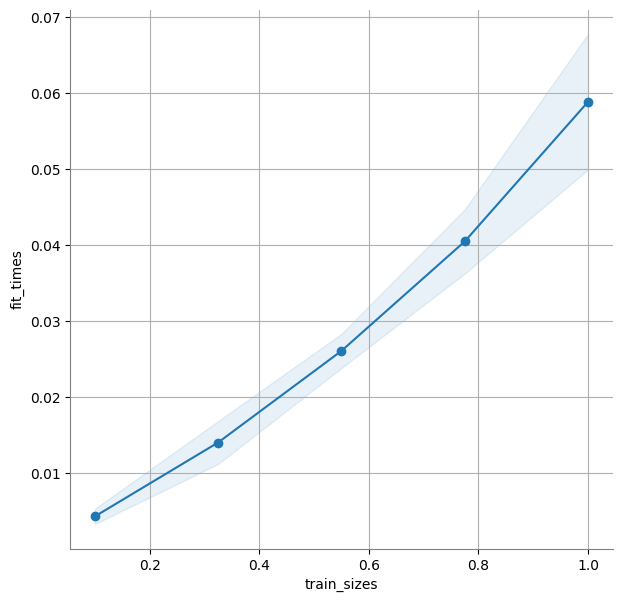

In [10]:
plt.figure(figsize=(7, 7))

plot_result(
    x=train_sizes,
    mean=fit_times_mean,
    std=fit_times_std,
    color="tab:blue",
)


format_plot()

plt.xlabel("train_sizes")
plt.ylabel("fit_times")
plt.show()

## 3.2.4.8 Gráfica test_scores vs fit_times

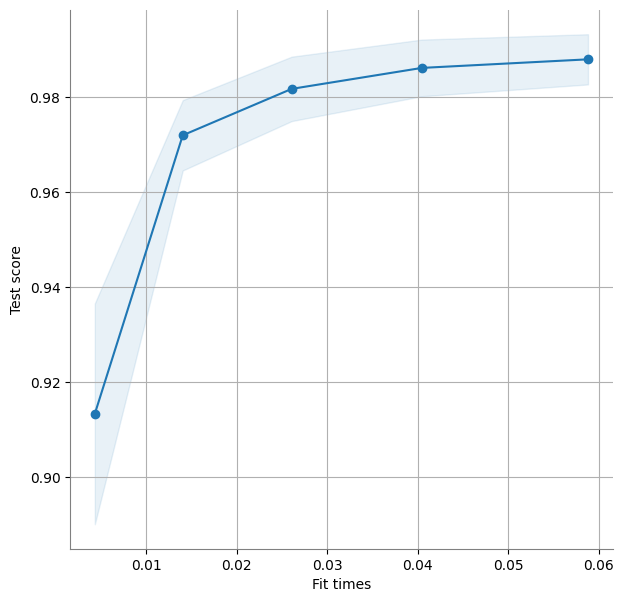

In [11]:
plt.figure(figsize=(7, 7))

plot_result(
    x=fit_times_mean, mean=test_scores_mean, std=test_scores_std, color="tab:blue"
)

format_plot()

plt.xlabel("Fit times")
plt.ylabel("Test score")
plt.show()

## 3.2.4.9 Gráfica score_times vs train_sizes

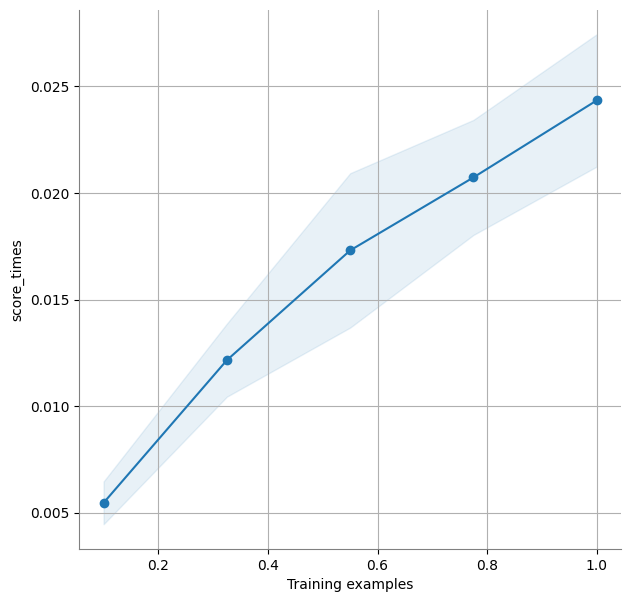

In [12]:
plt.figure(figsize=(7, 7))

plot_result(x=train_sizes, mean=score_times_mean, std=score_times_std, color="tab:blue")
format_plot()

plt.xlabel("Training examples")
plt.ylabel("score_times")
plt.show()

## 3.2.4.10 Gráfica test_scores vs score_times

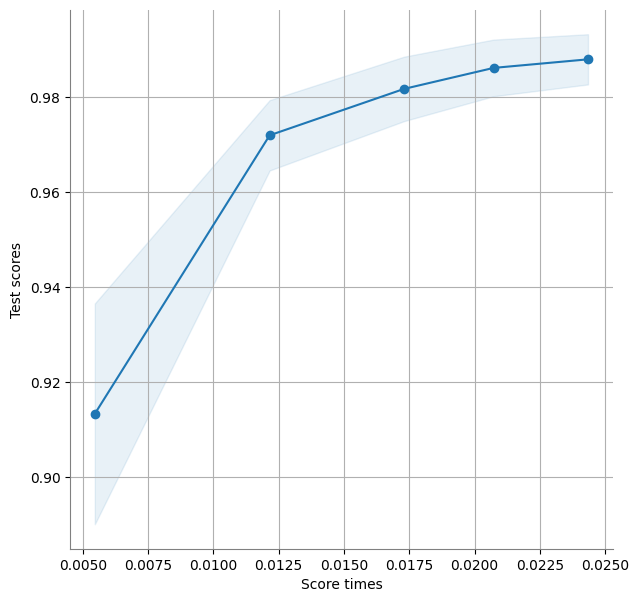

In [13]:
plt.figure(figsize=(7, 7))

plot_result(
    x=score_times_mean,
    mean=test_scores_mean,
    std=test_scores_std,
    color="tab:blue",
)


format_plot()

plt.xlabel("Score times")
plt.ylabel("Test scores")
plt.show()

In [6]:
print('ok_')

ok_
